In [1]:
import pandas as pd
import datetime
import numpy as np
import scipy as sp
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
font = {'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
#os.chdir("/root/Envs/btc-analysis/btc-price-analysis")
time_format = "%Y-%m-%dT%H:%M:%SZ"

In [2]:
score_data = pd.read_csv("../data/indico_nyt_bitcoin.csv", index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x, time_format))
score_data.head()

,headline,indico_score
time,,
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-01-16 01:01:41,"'Good Wife' Watch: Jason Biggs, Jim Cramer and...",0.599536
2012-04-12 14:30:13,Canada Seeks to Turn Coins Into Digital Currency,0.429367
2013-03-12 20:28:27,Today's Scuttlebot: Bitcoin Problem and Tracki...,0.486258
2013-04-08 00:00:00,"Bubble or No, This Virtual Currency Is a Lot o...",0.469938


#### Compute average sentiment score per week

make it 0.5 if no news that week.

In [28]:
weekly_score = score_data.resample('w', how='mean').loc['2013':].fillna(0.5)
weekly_score.head()

,indico_score
time,
2013-01-06,0.5
2013-01-13,0.5
2013-01-20,0.5
2013-01-27,0.5
2013-02-03,0.5


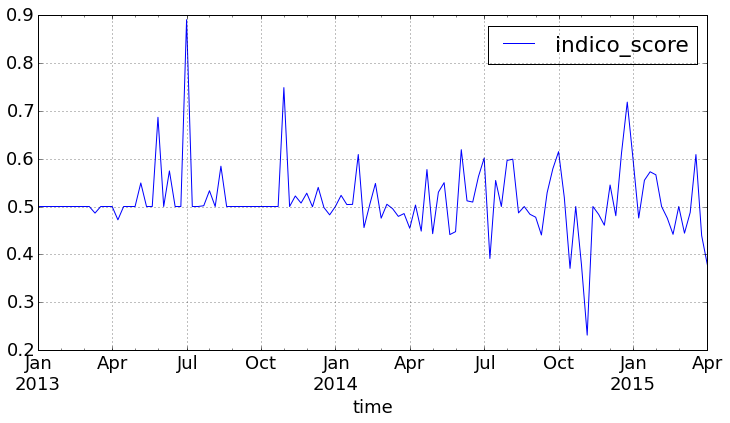

In [9]:
weekly_score.plot()

read bitcoin price data

In [16]:
time_format = "%Y-%m-%dT%H:%M:%S"
data = pd.read_csv("../data/price.csv", names=['time', 'price'], index_col='time',
                   parse_dates=[0], date_parser=lambda x: datetime.datetime.strptime(x[:-6], time_format))
bpi = data.resample('w', how='ohlc')
bpi.index.name = 'time'
bpi = pd.DataFrame(bpi['price']['close']).loc['2013':]
bpi.head()

,close
time,
2013-01-06,13.45
2013-01-13,14.19
2013-01-20,16.10
2013-01-27,17.87
2013-02-03,20.87


In [29]:
trend_bpi = pd.merge(weekly_score, bpi, how='right', left_index=True, right_index=True)
trend_bpi.columns = ['sentiment', 'close_price']
trend_bpi.head()

,sentiment,close_price
time,,
2013-01-06,0.5,13.45
2013-01-13,0.5,14.19
2013-01-20,0.5,16.10
2013-01-27,0.5,17.87
2013-02-03,0.5,20.87


add news volume data

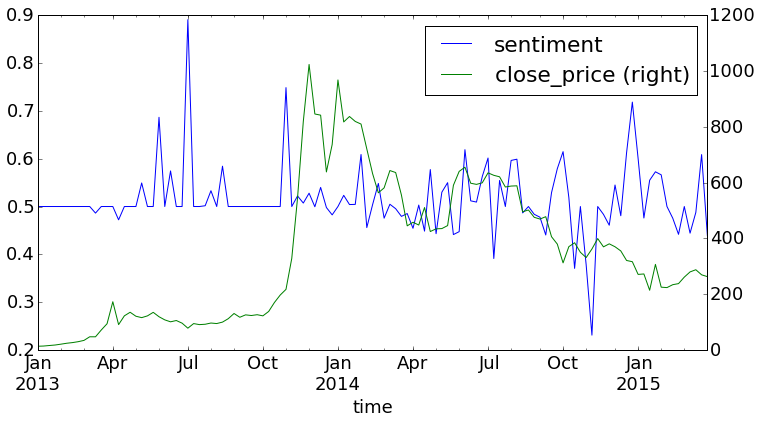

In [36]:
trend_bpi.plot(secondary_y='close_price')

In [37]:
trend_bpi.corr()

,sentiment,close_price
sentiment,1.000000,-0.049097
close_price,-0.049097,1.000000
